<a href="https://colab.research.google.com/github/zeyneppniisa/Heart-Disease-Prediction/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##What is in the Data

In [4]:
import pandas as pd
# Specify the file path
dosya_yolu = '/content/drive/MyDrive/dataset_heart.csv'

# Read the csv file
df = pd.read_csv(dosya_yolu)

###Quick Information About the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

##Stastical Description of Data

In [6]:
df.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


###Presence of Heart Disease by Age

In [7]:
# Calculate the presence of heart disease as a percentage according to age
heart_disease_percentage = df.groupby('age')['heart disease'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Select 2 in the Heart disease column
heart_disease_present = heart_disease_percentage[heart_disease_percentage['heart disease'] == 2]


<ipython-input-8-a5fcd771c9d5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='Percentage', data=heart_disease_present, palette='viridis')


Text(0, 0.5, 'Presence of Heart Disease (%)')

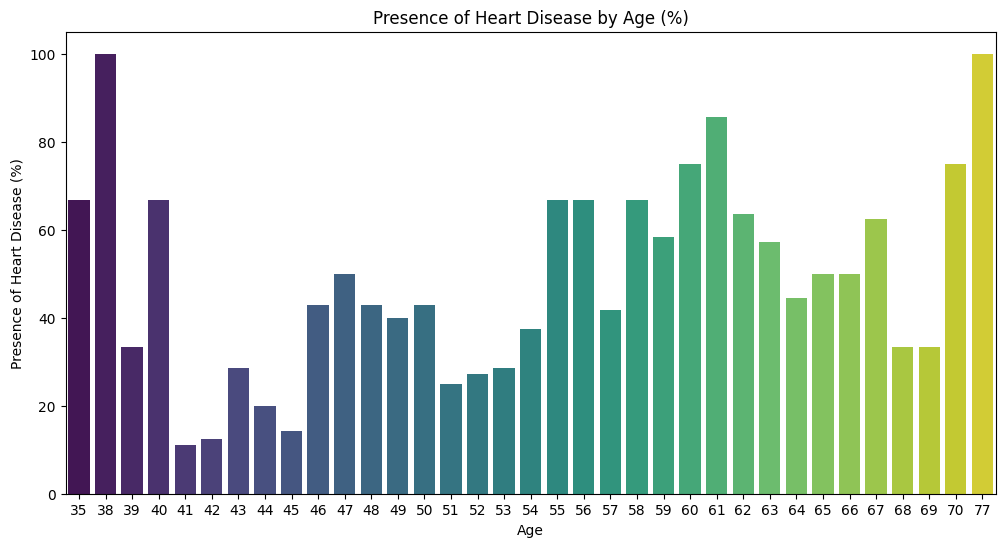

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='Percentage', data=heart_disease_present, palette='viridis')
plt.title('Presence of Heart Disease by Age (%)')
plt.xlabel('Age')
plt.ylabel('Presence of Heart Disease (%)')

##Presence of Heart Disease by Fasting Blood Sugar

In [9]:
# Calculate the presence of heart disease as a percentage according to age
heart_disease_percentage2 = df.groupby('fasting blood sugar')['heart disease'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Select 2 in the Heart disease column
heart_disease_present2 = heart_disease_percentage2[heart_disease_percentage2['heart disease'] == 2]

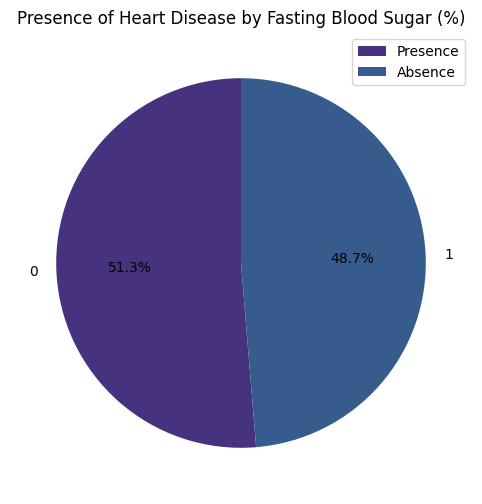

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Pie chart
plt.figure(figsize=(12, 6))
plt.pie(heart_disease_present2['Percentage'], labels=heart_disease_present2['fasting blood sugar'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Presence of Heart Disease by Fasting Blood Sugar (%)')
plt.legend(['Presence','Absence'])
plt.show()

##Splitting the Dataset into Independent Variables (X) and Dependent Variable (y)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
x = df.drop(columns = 'heart disease',axis=1)
y = df['heart disease']

In [13]:
print(x)

     age  sex   chest pain type  resting blood pressure  serum cholestoral  \
0     70     1                4                     130                322   
1     67     0                3                     115                564   
2     57     1                2                     124                261   
3     64     1                4                     128                263   
4     74     0                2                     120                269   
..   ...   ...              ...                     ...                ...   
265   52     1                3                     172                199   
266   44     1                2                     120                263   
267   56     0                2                     140                294   
268   57     1                4                     140                192   
269   67     1                4                     160                286   

     fasting blood sugar  resting electrocardiographic results 

In [14]:
print(y)

0      2
1      1
2      2
3      1
4      1
      ..
265    1
266    1
267    1
268    1
269    2
Name: heart disease, Length: 270, dtype: int64


##Splitting the Dataset into Training and Test Subsets

In [15]:
x_train, x_test ,y_train ,y_test = train_test_split(x, y,test_size=0.2,stratify=y, random_state=2)


##Creating a Logistic Regression Model







In [16]:
model = LogisticRegression()

## Training the Model

In [17]:
#training the logistic regression model wit training data
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##Make Predictions and Calculate Accuracy Score

In [18]:
x_train_prediction = model.predict(x_train)
trainig_data_accuracy = accuracy_score(x_train_prediction, y_train)


In [19]:
print('Accuracy on the Training data: ',trainig_data_accuracy)


Accuracy on the Training data:  0.875


In [20]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [21]:
print('Accuracy on the test data: ',test_data_accuracy)

Accuracy on the test data:  0.8333333333333334


##Testing

In [22]:
# Input data for prediction
input_data = (66, 1, 4, 128, 528, 0, 2, 132, 0, 2.8, 2, 3, 7)

# Convert input data to a list
input_data_as_list = list(input_data)

# Reshape the list as we are predicting for only one instance
input_data_reshaped = [input_data_as_list]

# Make a prediction using the trained model
prediction = model.predict(input_data_reshaped)

# Display the prediction result
if prediction[0] == 0:
    print('Does not have a heart disease')
else:
    print('Has heart disease')


Has heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
